#### [지도학습 - 선형 모델: 다항회귀]
- 주제 : 농어의 길이에 따른 무게 예측 모델 구현
- 데이터: ../Data/fish.csv
- 종류 : 지도학습 - 수치값 예측 즉, 회귀
- 방법 : 선형모델을 기반으로 구현 => LinearRegression

[1] 모듈 로딩 및 데이터 준비 <hr>

In [2]:
# ================================================================
# [1-1] 모듈 로딩
# ================================================================

# 기본 
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

# 머신러닝 전처리
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

# 머신러닝 학습 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# 머신러닝 성능평가
from sklearn.metrics import r2_score, f1_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

# ================================================================
# [1-2] 데이터 준비
# ================================================================
FILE_NAME = '../Data/fish.csv'
fishDF = pd.read_csv(FILE_NAME, 
                     usecols=[1,2], skiprows=73, nrows=55, 
                     header=None, names=['Weight', 'Length'])
# ================================================================
# [1-3] 데이터 확인
# ================================================================
display(fishDF.head(3))
display(fishDF.tail(3))
print(fishDF.info())
print(fishDF)

,Weight,Length
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0


,Weight,Length
52,1000.0,43.0
53,1100.0,43.0
54,1000.0,43.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  55 non-null     float64
 1   Length  55 non-null     float64
dtypes: float64(2)
memory usage: 1012.0 bytes
None
    Weight  Length
0      5.9     8.4
1     32.0    13.7
2     40.0    15.0
3     51.5    16.2
4     70.0    17.4
5    100.0    18.0
6     78.0    18.7
7     80.0    19.0
8     85.0    19.6
9     85.0    20.0
10   110.0    21.0
11   115.0    21.0
12   125.0    21.0
13   130.0    21.3
14   120.0    22.0
15   120.0    22.0
16   130.0    22.0
17   135.0    22.0
18   110.0    22.0
19   130.0    22.5
20   150.0    22.5
21   145.0    22.7
22   150.0    23.0
23   170.0    23.5
24   225.0    24.0
25   145.0    24.0
26   188.0    24.6
27   180.0    25.0
28   197.0    25.6
29   218.0    26.5
30   300.0    27.3
31   260.0    27.5
32   265.0    27.5
33   250.0    27.5
34   250.0    28.0
35   300.0    2

[2] 데이터 전처리 <hr>

In [354]:
# [2-1] 피쳐와 타겟 분리
featureDF = fishDF[fishDF.columns[1:]]
targetSR = fishDF[fishDF.columns[0]]
print(f"featureDF : {featureDF.shape}, targetSR : {targetSR.shape}")

featureDF : (55, 1), targetSR : (55,)


In [355]:
# [2-2] 학습용/테스트용 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(
    featureDF,
    targetSR,
    random_state=42,
    test_size=0.2)

In [356]:
# [2-3] DT계열에 제외한 선형모델, 거리기반 모델 등은 피쳐 스케일링 진행
#       => 피쳐 1개로 스케일링 x

[3] 학습 진행 <hr>

가중치 : [35.99279017], 절편 : -622.1488883813564

선형회귀 모델 train_score : 0.9069
선형회귀 모델 test_score  : 0.9367

 [-478.1777277   457.63481674  997.5266693 ]


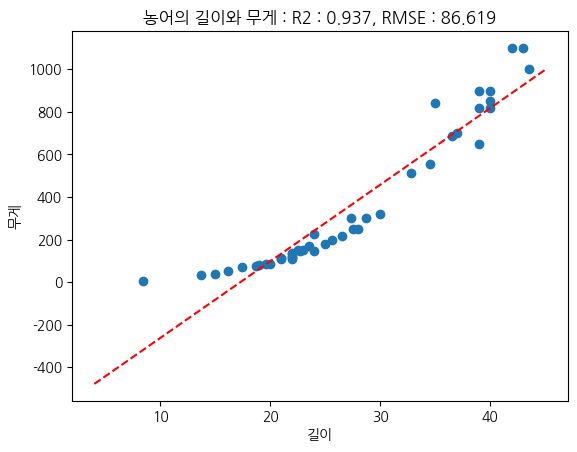

In [357]:
# =================================================================
# [3-1] 일반 선형 모델
# =================================================================
lrModel = LinearRegression()
lrModel.fit(x_train, y_train)

print(f"가중치 : {lrModel.coef_}, 절편 : {lrModel.intercept_}\n")

# =================================================================
# [3-2] 일반 선형 모델 평가 진행
# =================================================================
print(f"선형회귀 모델 train_score : {lrModel.score(x_train, y_train):.4f}")
print(f"선형회귀 모델 test_score  : {lrModel.score(x_test, y_test):.4f}")

# 회귀 모델 성능지표
pre_weights = lrModel.predict(x_test)
r2_ = r2_score(y_test, pre_weights)
rmse_ = root_mean_squared_error(y_test, pre_weights)

# =================================================================
# [3-3] 일반 성형 모델 시각화
# =================================================================
new_data = [[4], [30], [45]]
newDF = pd.DataFrame(new_data, columns=fishDF.columns[1:])
preSR = lrModel.predict(newDF)
print('\n', preSR)

plt.scatter(x_train, y_train)
plt.xlabel("길이")
plt.ylabel("무게")
plt.title(f"농어의 길이와 무게 : R2 : {r2_:.3f}, RMSE : {rmse_:.3f}")

plt.plot(newDF, preSR, 'r--')

[4] 피쳐 생성 + 학습 진행 + 성능 평가 <hr>

In [358]:
# =================================================================
# [4-0] 피쳐 스케일링 : 
# =================================================================
stdScalelr = StandardScaler()
scaled_x_train = stdScalelr.fit_transform(x_train)
scaled_x_test = stdScalelr.transform(x_test)

In [359]:
# =================================================================
# [4-1] 피쳐 생성 : 기존 피쳐 조합, 제곱항으로 피쳐 생성
# =================================================================
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)

print(f"poly: {x_train.shape} → x_train_poly:{x_train_poly.shape}")

poly: (44, 1) → x_train_poly:(44, 4)


In [360]:
# =================================================================
# [4-2] 다항 회귀 학습 진행
# =================================================================
plrModel = LinearRegression()
plrModel.fit(x_train_poly, y_train)
print(f"가중치 : {plrModel.coef_}, 절편 : {plrModel.intercept_}\n")

가중치 : [ 0.00000000e+00 -3.16924831e+01  1.34986988e+00 -3.51832928e-03], 절편 : 208.5745555672744



In [361]:
# =================================================================
# [4-3] 다항 회귀 선형 모델 학습 진행
# =================================================================
x_test_poly = poly.transform(x_test)

train_score = plrModel.score(x_train_poly, y_train)
test_score  = plrModel.score(x_test_poly, y_test)

print(f"[TRAIN] {train_score}")
print(f"[TEST] {test_score}")

[TRAIN] 0.9726372407685093
[TEST] 0.9772813384506673



 [  66.25501367   51.66401121   39.62497869   30.11680612   23.11838353
   18.60860094   16.56634838   16.97051587   19.79999343   25.0336711
   32.65043889   42.62918683   54.94880494   69.58818325   86.52621179
  105.74178056  127.21377961  150.92109896  176.84262862  204.95725863
  235.243879    267.68137977  302.24865095  338.92458257  377.68806466
  418.51798724  461.39324033  506.29271396  553.19529815  602.07988293
  652.92535831  705.71061434  760.41454102  817.01602839  875.49396646
  935.82724527  997.99475484 1061.97538518 1127.74802633]
0.9772813384506673, 51.87156574972651


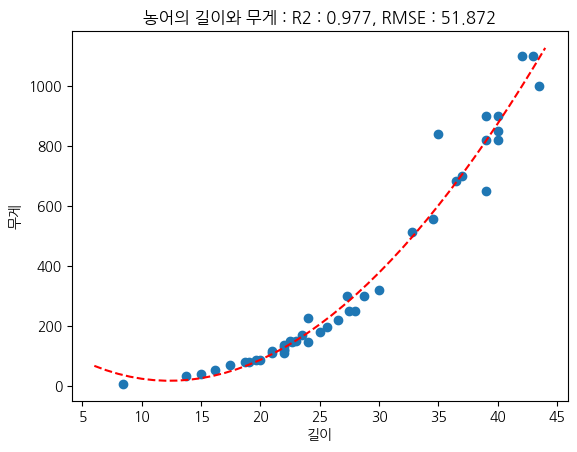

In [362]:
# =================================================================
# [4-4] 다항 회귀 선형 모델 시각화
# =================================================================
new_data=np.arange(6, 45).reshape(-1, 1)    #  -1: 알아서 계산해라, 컬럼 1개, 행은 계산
newDF = pd.DataFrame(new_data, columns=fishDF.columns[1:], )
sclaed_newNP = stdScalelr.transform(newDF)  # 스케일링
poly_newDF = poly.transform(newDF)          # 다차원
preSR = plrModel.predict(poly_newDF)        # 예측
print('\n', preSR)

# 회귀 모델 성능지표
pre_weights = plrModel.predict(x_test_poly)
r2_ = r2_score(y_test, pre_weights)
rmse_ = root_mean_squared_error(y_test, pre_weights)
print(f"{r2_}, {rmse_}")

plt.scatter(x_train, y_train)
plt.xlabel("길이")
plt.ylabel("무게")
plt.title(f"농어의 길이와 무게 : R2 : {r2_:.3f}, RMSE : {rmse_:.3f}")

plt.plot(newDF, preSR, 'r--')